In [1]:
import os

from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_retrieval_chain
from dotenv import load_dotenv

In [2]:
load_dotenv()
## load the GROQ API Key
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
groq_api_key = os.getenv("GROQ_API_KEY")

## If you do not have open AI key use the below Huggingface embedding
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")

In [3]:
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

llm = ChatGroq(groq_api_key=groq_api_key, model_name="Llama3-8b-8192")

/Users/amit/educative/grapRag/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
llm.invoke("tell me a joke")

AIMessage(content="Here's one:\n\nWhy couldn't the bicycle stand up by itself?\n\n(Wait for it...)\n\nBecause it was two-tired!\n\nHope that made you laugh!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 14, 'total_tokens': 47, 'completion_time': 0.0275, 'prompt_time': 0.004685692, 'queue_time': 0.5970376869999999, 'total_time': 0.032185692}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-aadb5d0e-f6dd-48c3-8b82-33a6c13e45eb-0', usage_metadata={'input_tokens': 14, 'output_tokens': 33, 'total_tokens': 47})

In [5]:
embeddings.embed_query("what is the embeddigng of this sentence?")

[0.057990118861198425,
 0.041364263743162155,
 0.06764058768749237,
 -0.017624542117118835,
 0.02342291921377182,
 0.05958905816078186,
 0.0754469484090805,
 0.023752905428409576,
 0.015532885678112507,
 -0.05032842233777046,
 0.10318584740161896,
 -0.007399195805191994,
 0.032279547303915024,
 -0.061198849231004715,
 -0.11143757402896881,
 0.0519709587097168,
 -0.0005154299433343112,
 0.02895287051796913,
 -0.10140156000852585,
 -0.014743875712156296,
 -0.056795231997966766,
 0.04892675206065178,
 0.05324842780828476,
 -0.04790183901786804,
 0.06571468710899353,
 0.08100837469100952,
 -0.01030375249683857,
 0.054838694632053375,
 0.0624050609767437,
 -0.030469104647636414,
 0.0011972725624218583,
 -0.061725467443466187,
 -9.515624697087333e-05,
 0.031651534140110016,
 -0.017107563093304634,
 0.037338435649871826,
 0.03405124321579933,
 -0.040304943919181824,
 0.035198111087083817,
 0.012985043227672577,
 0.018006347119808197,
 -0.022019468247890472,
 -0.013369687832891941,
 0.04718721

In [6]:
def extract_entities_relationships1(text):
    messages = [
        {
            "role": "system",
            "content": """"
  You are a helper tool for a knowedge graph builder application. Your task is to extract entities and relationships from the text provided by the user. 
  Format the output in such a way that it can be directly parsed into Python lists. 
  The format should include:
  
  1. A list of **Entities** in Python list format.
  2. A list of **Relationships**, where each relationship is represented as a tuple in the format: (Entity 1, "Relationship", Entity 2).
  
  Here is the format to follow:
  
  Entities: ["Entity 1", "Entity 2", ..., "Entity N"]
  
  Relationships: [("Entity 1", "Relationship", "Entity 2"), ..., ("Entity X", "Relationship", "Entity Y")]
  
  Example Input:
  Extract entities and relationships from the following text:
  "Michael Jackson, born in Gary, Indiana, was a famous singer known as the King of Pop. He passed away in Los Angeles in 2009."
  
  Expected Output:
  
  Entities: ["Michael Jackson", "Gary, Indiana", "Los Angeles", "singer", "King of Pop", "2009"]
  
  Relationships: [
    ("Michael Jackson", "born in", "Gary, Indiana"), 
    ("Michael Jackson", "profession", "singer"), 
    ("Michael Jackson", "referred to as", "King of Pop"), 
    ("Michael Jackson", "passed away in", "Los Angeles"), 
    ("Michael Jackson", "date of death", "2009")
  ]
  """,
        },
        {
            "role": "user",
            "content": f"Extract entities and relationship tuples from the following text:\n\n{text}\n\n",
        },
    ]

    response = llm.invoke(messages)
    print(response)

In [7]:
raw_text = "Sarah is an avid traveler who recently visited New York City. During her trip, she saw the Statue of Liberty, which was designed by Frédéric Auguste Bartholdi and completed in 1886. Sarah also visited the Empire State Building, which was completed in 1931 and was designed by Shreve, Lamb & Harmon. Sarah took a memorable photo in front of the Brooklyn Bridge, which was designed by John A. Roebling and completed in 1883. She also visited Central Park, a large public park in New York City."
extract_entities_relationships1(raw_text)

content='Here are the extracted entities and relationships in the required format:\n\nEntities: ["Sarah", "New York City", "Statue of Liberty", "Frédéric Auguste Bartholdi", "Empire State Building", "Shreve, Lamb & Harmon", "Brooklyn Bridge", "John A. Roebling", "Central Park", "1886", "1931", "1883"]\n\nRelationships: [\n    ("Sarah", "visited", "New York City"), \n    ("Sarah", "saw", "Statue of Liberty"), \n    ("Statue of Liberty", "was designed by", "Frédéric Auguste Bartholdi"), \n    ("Statue of Liberty", "was completed in", "1886"), \n    ("Sarah", "visited", "Empire State Building"), \n    ("Empire State Building", "was designed by", "Shreve, Lamb & Harmon"), \n    ("Empire State Building", "was completed in", "1931"), \n    ("Sarah", "took a photo in front of", "Brooklyn Bridge"), \n    ("Brooklyn Bridge", "was designed by", "John A. Roebling"), \n    ("Brooklyn Bridge", "was completed in", "1883"), \n    ("Sarah", "visited", "Central Park"), \n    ("Central Park", "is locate

In [8]:
def extract_entities_relationships2(text):
    messages = [
        {
            "role": "system",
            "content": """"
  You are a helper tool for a knowedge graph builder application. Your task is to extract entities and relationships from the text provided by the user. 
  Format the output in such a way that it can be directly parsed into Python lists. 
  The format should include:
  
  1. A list of **Entities** in Python list format.
  2. A list of **Relationships**, where each relationship is represented as a tuple in the format: (Entity 1, "Relationship", Entity 2).
  
  Here is the format to follow:
  
  Entities: ["Entity 1", "Entity 2", ..., "Entity N"]
  
  Relationships: [("Entity 1", "Relationship", "Entity 2"), ..., ("Entity X", "Relationship", "Entity Y")]
  
  Example Input:
  Extract entities and relationships from the following text:
  "Michael Jackson, born in Gary, Indiana, was a famous singer known as the King of Pop. He passed away in Los Angeles in 2009."
  
  Expected Output:
  
  Entities: ["Michael Jackson", "Gary, Indiana", "Los Angeles", "singer", "King of Pop", "2009"]
  
  Relationships: [
      ("Michael Jackson", "born in", "Gary, Indiana"), 
      ("Michael Jackson", "profession", "singer"), 
      ("Michael Jackson", "referred to as", "King of Pop"), 
      ("Michael Jackson", "passed away in", "Los Angeles"), 
      ("Michael Jackson", "date of death", "2009")
  ]
  """,
        },
        {
            "role": "user",
            "content": f"Extract entities and relationship tuples from the following text:\n\n{text}\n\n",
        },
    ]

    response = llm.invoke(messages)
    return response


import re
import ast
import json
import re
from typing import Union
from langchain.schema import AIMessage  # Assuming you're using langchain


def parse_llm_response_content(content: Union[str, AIMessage]):
    # If content is an AIMessage, extract the content string
    if isinstance(content, AIMessage):
        content = content.content

    # Extract entities
    entities_match = re.search(r"Entities: (\[.*?\])", content, re.DOTALL)
    entities = eval(entities_match.group(1)) if entities_match else []

    # Extract relationships
    relationships_match = re.search(r"Relationships: (\[.*?\])", content, re.DOTALL)
    relationships = eval(relationships_match.group(1)) if relationships_match else []

    # Count entities and relationships
    # nEntities = len(entities)
    # nRelationships = len(relationships)

    return entities, relationships

In [9]:
raw_text = "Sarah is an avid traveler who recently visited New York City. During her trip, she saw the Statue of Liberty, which was designed by Frédéric Auguste Bartholdi and completed in 1886. Sarah also visited the Empire State Building, which was completed in 1931 and was designed by Shreve, Lamb & Harmon. Sarah took a memorable photo in front of the Brooklyn Bridge, which was designed by John A. Roebling and completed in 1883. She also visited Central Park, a large public park in New York City."
content2 = extract_entities_relationships2(raw_text)
entities, relationships = parse_llm_response_content(content2)
print("\n Entity list (Python):\n ", entities)
print("\n Relationship tuple list (Python):\n", relationships)


 Entity list (Python):
  ['Sarah', 'New York City', 'Statue of Liberty', 'Frédéric Auguste Bartholdi', '1886', 'Empire State Building', 'Shreve, Lamb & Harmon', '1931', 'Brooklyn Bridge', 'John A. Roebling', '1883', 'Central Park']

 Relationship tuple list (Python):
 [('Sarah', 'visited', 'New York City'), ('Sarah', 'saw', 'Statue of Liberty'), ('Statue of Liberty', 'designed by', 'Frédéric Auguste Bartholdi'), ('Statue of Liberty', 'completed in', '1886'), ('Sarah', 'visited', 'Empire State Building'), ('Empire State Building', 'designed by', 'Shreve, Lamb & Harmon'), ('Empire State Building', 'completed in', '1931'), ('Sarah', 'visited', 'Brooklyn Bridge'), ('Brooklyn Bridge', 'designed by', 'John A. Roebling'), ('Brooklyn Bridge', 'completed in', '1883'), ('Sarah', 'visited', 'Central Park')]


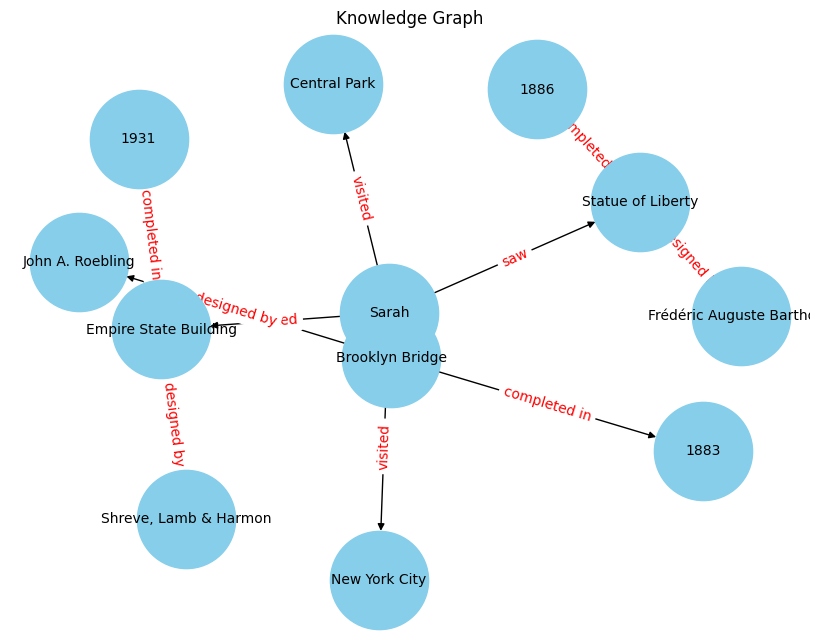

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


def plot_knowledge_graph(entities, relationships):
    G = nx.DiGraph()
    for entity1, relationship, entity2 in relationships:
        G.add_edge(entity1, entity2, label=relationship)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="skyblue",
        node_size=5000,
        edge_color="black",
        font_size=10,
    )
    edge_labels = {
        (entity1, entity2): relationship
        for entity1, relationship, entity2 in relationships
    }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    plt.title("Knowledge Graph")
    plt.show()


plot_knowledge_graph(entities, relationships)